# Diving photo tuning

I'm a scuba diver, and I like taking photos underwater. Some people recommend using a plastic magenta filter, but I don't think that's too smart, since any filter will diminish the amount of light that comes into the lens. If what we want with a filter is color correction, we can do that programmatically, and that's what I want to achieve with this notebook.

I've been manually editing my diving photos with a number of image editing softwares, but I want to create something to improve my photos automatically.

What I want to do, in a few words, is making red shades stronger, green ones weaker, while cranking sharpness and contrast up a notch.

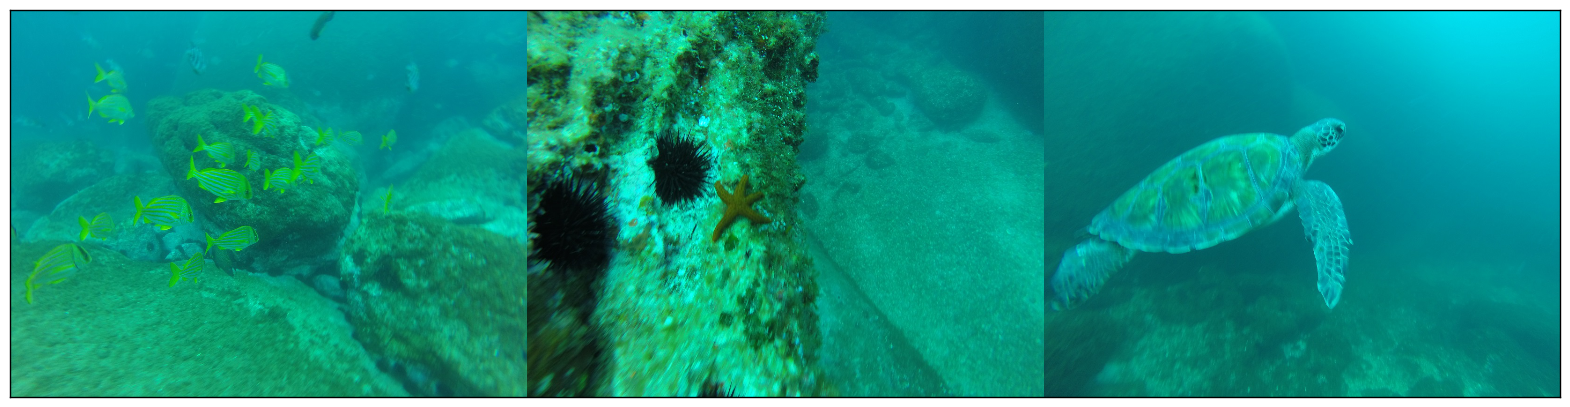

In [1]:
import scipy.ndimage as ndi
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

def plotImage(image):
    plt.figure(figsize=(20,10))
    imagePlotting = plt.imshow(image)
    imagePlotting.axes.get_xaxis().set_visible(False)
    imagePlotting.axes.get_yaxis().set_visible(False)
    plt.show()
    
def makeImageStripe(images):
    result = numpy.zeros([width*3, height,3]);

    def copyIntoArray(origin, target, fromX, toX):
        target[...,0][fromX:toX] = 256-origin.T[0,...]
        target[...,1][fromX:toX] = 256-origin.T[1,...]
        target[...,2][fromX:toX] = 256-origin.T[2,...]

    copyIntoArray(images[0], result, 0, width)
    copyIntoArray(images[1], result, width, width*2)
    copyIntoArray(images[2], result, width*2, width*3)

    result = result.transpose(1,0,2)
    
    return result

dive1 = ndi.imread("images/dive1.jpg")
dive2 = ndi.imread("images/dive2.jpg")
dive3 = ndi.imread("images/dive3.jpg")

width = len(dive1[0])
height = len(dive1)

stripeOriginal = makeImageStripe([dive1, dive2, dive3])

plotImage(stripeOriginal)

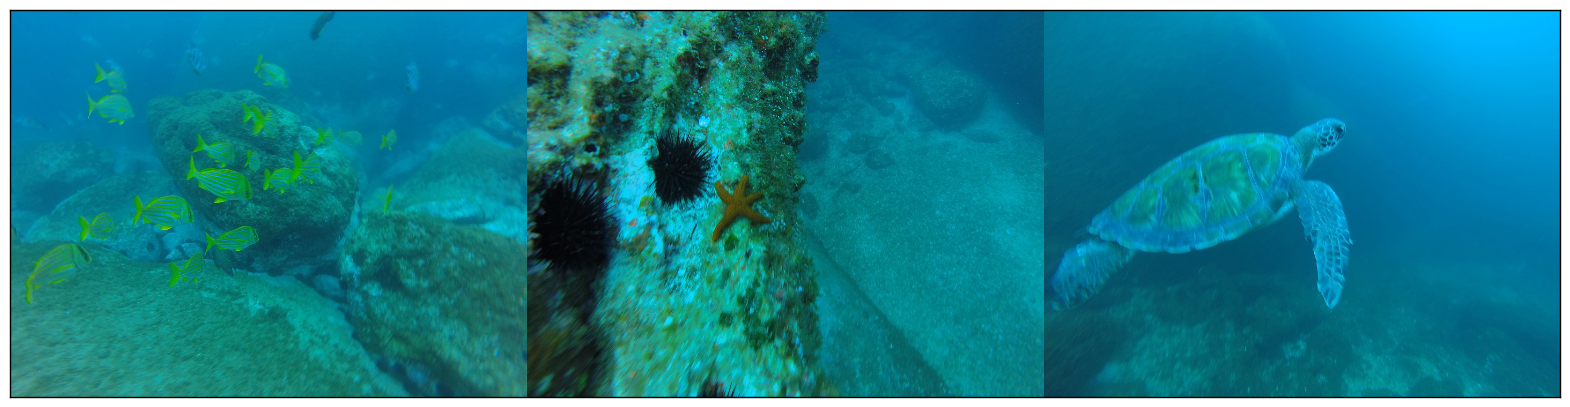

In [4]:
def tuneColors(img):
    
    tunedColors = img.copy()
    
    for x in range(width):
        for y in range(height):
            tunedColors[y][x][0] = min([img[y][x][0] * 1.3, 255]) #red
            tunedColors[y][x][1] = max([img[y][x][1] * 0.85, 0])  #green
            tunedColors[y][x][2] = min([img[y][x][2] * 1.1, 255]) #blue
            
    return tunedColors

tunedDive1 = tuneColors(dive1)
tunedDive2 = tuneColors(dive2)
tunedDive3 = tuneColors(dive3)

stripeTunedColors = makeImageStripe([tunedDive1, tunedDive2, tunedDive3])

plotImage(stripeTunedColors)

Original:


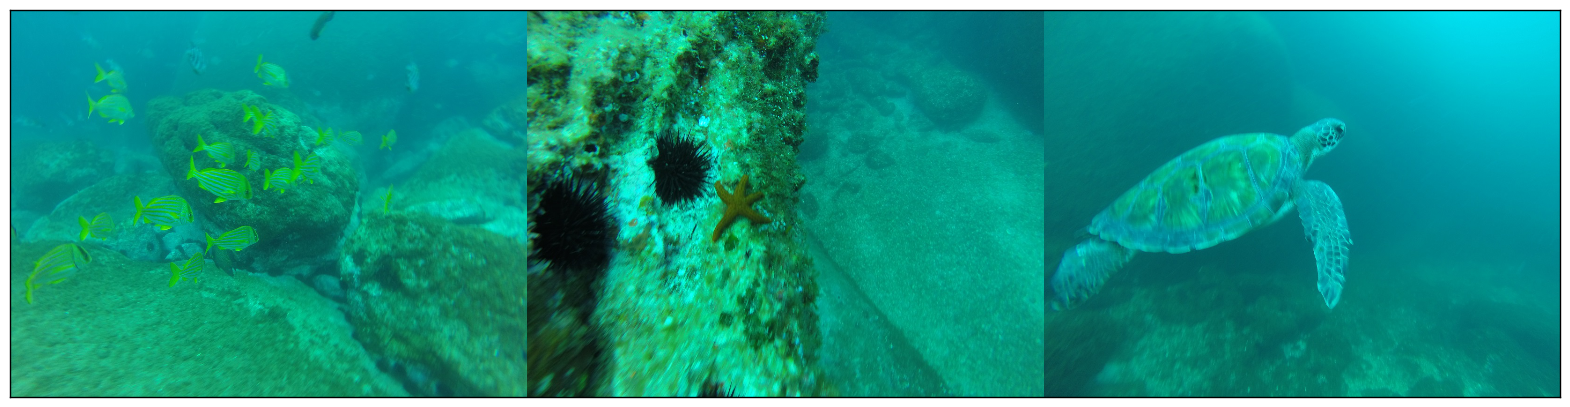

Tuned colors:


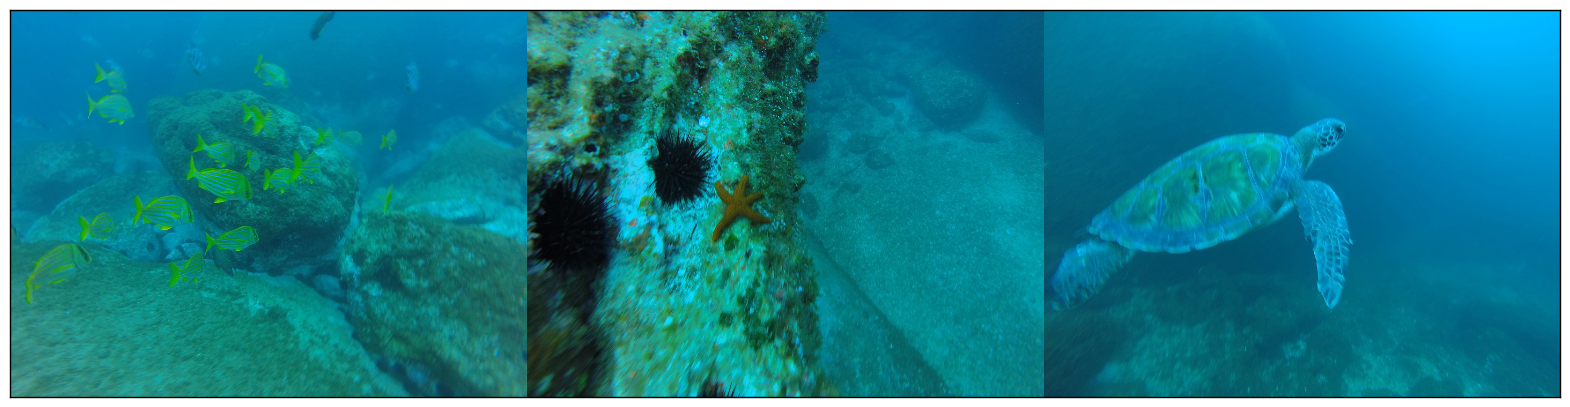

Enhanced sharpness and contrast:


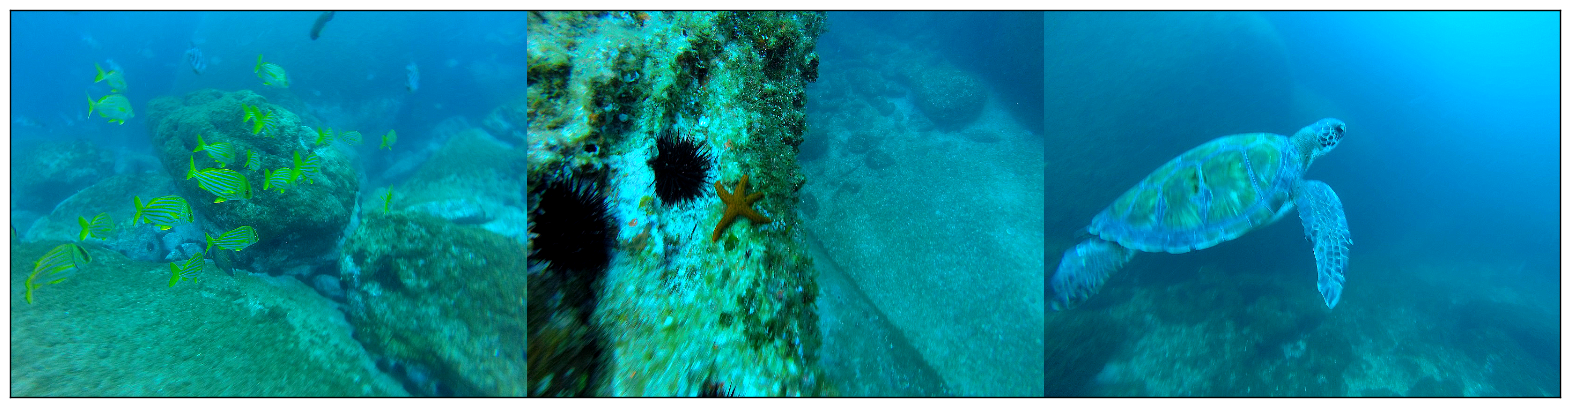

In [5]:
from PIL import Image
from PIL import ImageEnhance


def enhanceSharpnessAndContrast(img):
    sharpness = ImageEnhance.Sharpness(Image.fromarray(img)).enhance(3)
    contrast = ImageEnhance.Contrast(sharpness).enhance(1.3)
    
    return numpy.array(contrast)   

enhancedDive1 = enhanceSharpnessAndContrast(tunedDive1)
enhancedDive2 = enhanceSharpnessAndContrast(tunedDive2)
enhancedDive3 = enhanceSharpnessAndContrast(tunedDive3)

stripeEnhanced = makeImageStripe([enhancedDive1, enhancedDive2, enhancedDive3])

print("Original:")
plotImage(stripeOriginal)
print("Tuned colors:")
plotImage(stripeTunedColors)
print("Enhanced sharpness and contrast:")
plotImage(stripeEnhanced)